# importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [ ]:
df = pd.read_csv('/content/hotel_bookings.csv')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96466 entries, 0 to 96465
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           96466 non-null  object 
 1   is_canceled                     96466 non-null  int64  
 2   lead_time                       96466 non-null  int64  
 3   arrival_date_year               96465 non-null  float64
 4   arrival_date_month              96465 non-null  object 
 5   arrival_date_week_number        96465 non-null  float64
 6   arrival_date_day_of_month       96465 non-null  float64
 7   stays_in_weekend_nights         96465 non-null  float64
 8   stays_in_week_nights            96465 non-null  float64
 9   adults                          96465 non-null  float64
 10  children                        96461 non-null  float64
 11  babies                          96465 non-null  float64
 12  meal                            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,96466.000000,96466.000000,96465.000000,96465.000000,96465.000000,96465.000000,96465.000000,96465.000000,96461.000000,96465.000000,96465.000000,96465.000000,96465.000000,96465.000000,82335.000000,5786.000000,96465.000000,96465.000000,96465.000000,96465.000000
mean,0.458224,106.503100,2016.033204,27.201420,15.792661,0.948759,2.571575,1.856259,0.103648,0.008262,0.036003,0.107542,0.164609,0.205411,99.702362,179.843761,2.739263,98.757857,0.069901,0.503374
std,0.498254,108.267621,0.698661,13.438846,8.777307,1.026679,1.996789,0.589594,0.399483,0.100608,0.186298,0.938017,1.660677,0.629442,115.155315,129.705606,19.122929,51.952671,0.258414,0.753531
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,51.000000,0.000000,65.000000,0.000000,0.000000
50%,0.000000,72.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,174.000000,0.000000,90.000000,0.000000,0.000000
75%,1.000000,164.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,246.000000,0.000000,121.470000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.isna().mean().sort_values(ascending=False)*100

,0
company,94.002032
agent,14.648685
country,0.505878
children,0.005183
stays_in_weekend_nights,0.001037
adults,0.001037
arrival_date_year,0.001037
arrival_date_day_of_month,0.001037
babies,0.001037
meal,0.001037


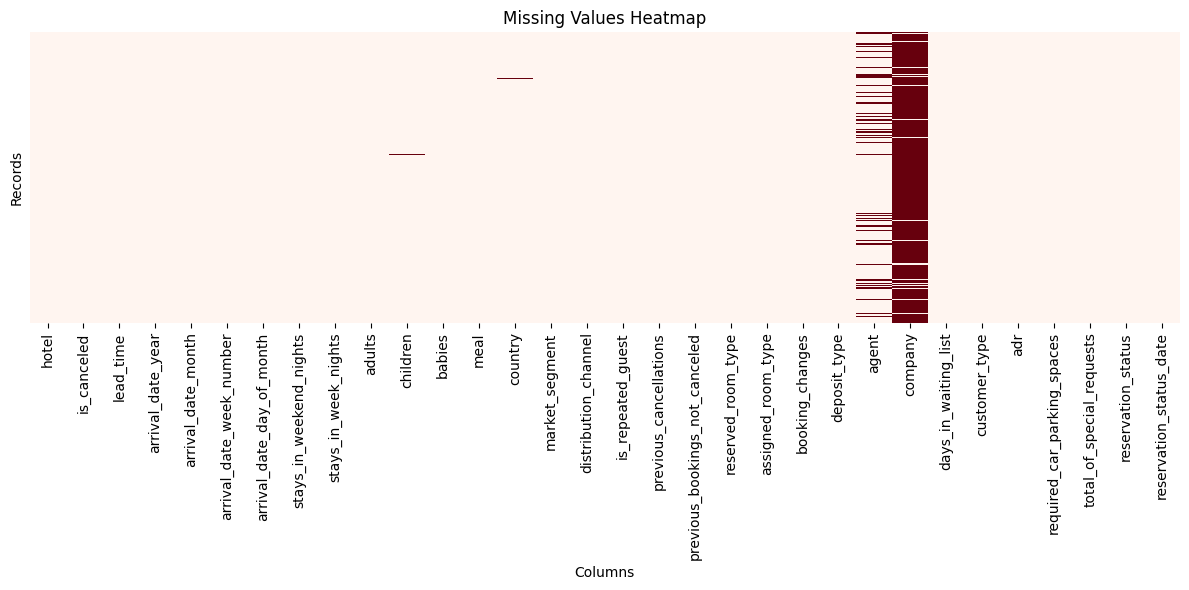

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Records")
plt.tight_layout()
plt.show()